<a href="https://colab.research.google.com/github/darthVarada/leaningML/blob/main/01_create_embedding_for_a_face_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition Anis Koubaa Udemy Course

## Notebook 1. Extract Face and Create Embedding

In this notebook, we develop the program that illustrates how to extract a face from an image using a face detector, namely MTCMM, and how to create the embedding of the extracted face using a face recognizer, namely facenet.

At the end of this hands-on activity, you will able to:

- Understand the whole loop of creating a face embedding
- Use MTCNN face detector to extract a face from an image
- Pre-process an extracted face before using a face recognizer
- Create an face embedding using FaceNet



## Face Detection and Face Recognition Background

A face recognition inference system comprises two major operations

- **Face detection**: the first step (Phase 1 in the Figure) consists in finding and extracting the bounding boxes of one or multiple faces in an input image. The earliest solution to this problem is the Viola-Jones object/face detection approach \cite{ViolaJones}, which dates back from 2001. The Viola-Jones algorithm is based on hand-crafted Haar-feature-based cascade classifiers. Nowadays, The state-of-the-art approach for face extractions is Multitask Cascaded Convolutional Networks (i.e., MTCNN) \cite{mtcnn2016} released in 2016, and based on convolutional neural networks. In this notebook, we use MTCNN as a face detector.
- **Face Identification**: This second step (Phase 2 and Phase 3 in the Figure) takes as input the list of extracted faces and processes them through a face recognizer to transform the raw image into a one-column vector representation, called ***face embedding***. The face embedding is compared to other face embeddings in a database to finally find the person's identity. There are several approaches proposed in the literature for face identification, including DeepFace from Facebook (2014), VGGFace and VGGFace 2.0 from University of Oxford (2015 and 2017 respectively), FaceNet from Google (2015), OpenFace and OpenFace2 from University of Pittsburgh (2016 and 2018 respectively). In this notebook, we use FaceNet as a face recognizer.

Checkout our paper from more details https://www.riotu-lab.org/face/

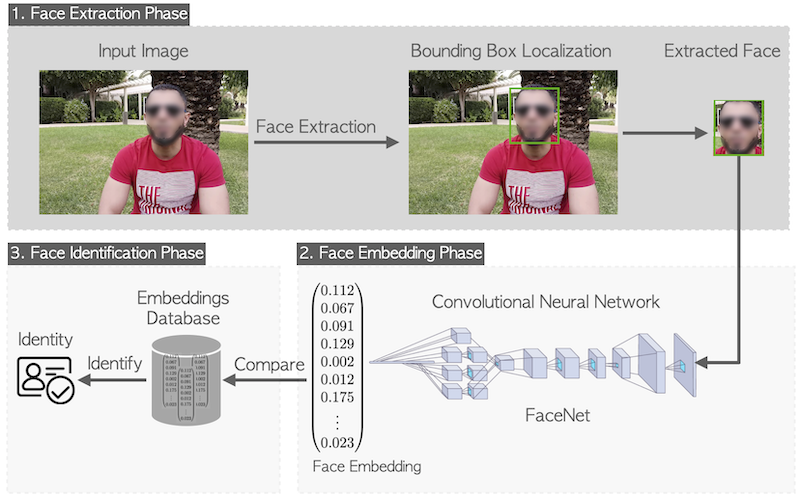

In this notebook, I will show you how to create a Face Embedding and save it in a file (Phase 1 and Phase 2).

In the next notebook, I will show you how to compare face embeddings to identify the person from a new image

### 1. Install and import Libraries
First, we start with installing and importing the required libraries and we need to install the MTCNN library, which is responsible for extracting faces in bounding boxes from an image. The other dependencies are already installed by the Google Colab environment.

Then, we import a few libraries that we need for some system utiliies.

In [2]:
%load_ext autoreload
%autoreload 2

import time
import os
import sys


We mount the Google Drive to be able to access the faces images from Google Drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let now specify the path to the project folder. In my case, the project folder is located at '/content/drive/My Drive/UdemyFaceRecognition'. If you put the project files in a different location, make sure to change the path accordingly to meet the correct address.

In [5]:
#complete the code from the lecture
PROJECT_PATH = '/content/drive/Meu Drive/face_recognition/UdemyFaceRecognition'
sys.path.append(PROJECT_PATH)
print(PROJECT_PATH)

/content/drive/Meu Drive/face_recognition/UdemyFaceRecognition


In [ ]:
#importing the library
import riotu_computer_vision_lib

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

### 2. Load a face image

Let us load an image that contains a face.
I have put a sample images of mine in the folder faces_images/Anis to be used in this notebook. You can use your own face image if you want.

We import the needed libraries to load and display an image.

In [6]:
# importing format librarys
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Let us create a method that will read an image from a file and put it in a numpy array, which is the format used by the openCV library

In [7]:
def read_image(image_path):
  image =Image.open(image_path)
  # convert to RGB, if needed
  image = image.convert('RGB')
  #convert to array numpy
  pixels = np.asarray(image)
  return pixels

Then, we create a method that will display an image. This is just to reuse them later in this notebook and make the operation simple.

In [ ]:
#complete the code from the lecture


Now, we are ready to read and visualize the image that we will extract the face from. We set the path to the image file and we call the method read_image that we created above

In [ ]:
#complete the code from the lecture


Now, let us display the image to process. Great! We are ready to go with extracting the face from this image. At a first glance it looks like there is only one face in this image. Let's get it.

Label = Anis
image shape:  (720, 1080, 3)


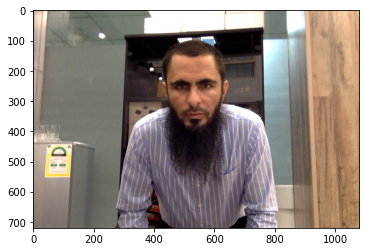

In [ ]:
#complete the code from the lecture


### 3. Extract Faces

Now that we have an image that contains a face, we need to extract the face from the image. For this purpose, we use a face detector. The most common face detector is called MTCNN. MTCNN is a python (pip) library written by Github user ipacz, which implements the paper Zhang, Kaipeng et al. “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.” IEEE Signal Processing Letters 23.10 (2016): 1499–1503. Crossref. Web.

https://github.com/ipazc/mtcnn

First, let us create a face detector instance that we will use to extract tha face

In [ ]:
#complete the code from the lecture


We use the detect_faces method, with the image as input, to extract the metadata of the faces in the image.

In [ ]:
#complete the code from the lecture


The faces_metadata is just a list where each element contains the metadata of each detected face, including, the coordinates of the bounding box, the confidence of the face detection, and the main keypoints of the face, namely, the coordinates of the left and right eyes, the nose,  the left mouth and the right mouth coordinates.

Let us see how many detcted faces in this image.
Suprisingly, we can observe that it detects two faces, while we can see only one. Let us visualize the two detected faces, as may be MTCNN is better than us in detecting hidden faces.

In [ ]:
#complete the code from the lecture


number of detected faces:  2


Let us the content of faces_metadata. It contains a list of JSON object, where each object contains the metatdata of a detected face/

In [ ]:
#complete the code from the lecture


[{'box': [442, 160, 178, 234], 'confidence': 0.9999990463256836, 'keypoints': {'left_eye': (491, 249), 'right_eye': (571, 248), 'nose': (530, 304), 'mouth_left': (502, 344), 'mouth_right': (566, 343)}}, {'box': [314, 292, 90, 106], 'confidence': 0.9724677801132202, 'keypoints': {'left_eye': (345, 337), 'right_eye': (378, 331), 'nose': (365, 359), 'mouth_left': (350, 378), 'mouth_right': (376, 373)}}]


As this is a list, we can access the first element, which is at index 0 as follows

In [ ]:
#complete the code from the lecture


{'box': [442, 160, 178, 234], 'confidence': 0.9999990463256836, 'keypoints': {'left_eye': (491, 249), 'right_eye': (571, 248), 'nose': (530, 304), 'mouth_left': (502, 344), 'mouth_right': (566, 343)}}


In the same way, we can access the metadata of the second face which is at index 1

In [ ]:
#complete the code from the lecture


{'box': [314, 292, 90, 106], 'confidence': 0.9724677801132202, 'keypoints': {'left_eye': (345, 337), 'right_eye': (378, 331), 'nose': (365, 359), 'mouth_left': (350, 378), 'mouth_right': (376, 373)}}


#### First Detected Face

Now, let us visualize the first detected face.
Observe that the bounding box of the detetcted face is represented by the key 'box' in the metadata JSON string representing the face.

We will access the first detected face, which is at the index face_index=0

* The first element at index 0 represents the x-coordinate of the upper left point of the box

* The second element at index 1 represents the y-coordinate of the upper left point of the box

* The third element represents the width of box

* The fourth element represents the height of the box.

Let us assign them to some variables

In [ ]:
#complete the code from the lecture


x= 442


To visualize the detected face, we can draw a rectangle on the detected face, by using the above coordinates of the bounding box of the detected face.

In [ ]:
#complete the code from the lecture


We visualize the image with bounding box on the face and indeed, it makes a perfect match with the detected face.

Label = First Detected Face
image shape:  (720, 1080, 3)


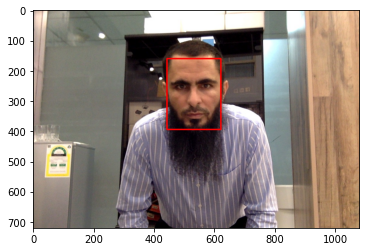

In [ ]:
#complete the code from the lecture


But, what is this second detected face. Let us visualize it.

#### Second Detected Face

We do the same thing, but getting the coordinate

In [ ]:
#complete the code from the lecture


x= 314


In [ ]:
#complete the code from the lecture


Label = Second Detected Face
image shape:  (720, 1080, 3)


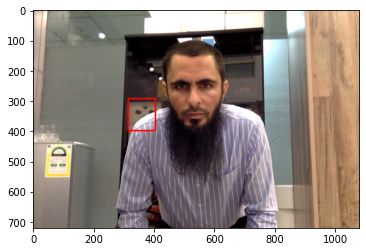

In [ ]:
#complete the code from the lecture


### Get JUST the face from the whole image

Now, we would like to extract only the first detected face and put it in a numpy array so that we can use it to create the embedding.

To extract the detected face, we need just to crop the image to the bounding box coordinate.
Then, we resize the image to input size 160 by 160 pixels as this is the required size for the facenet face recognition system.

Finally, we convert the resized image into a numpy array as this is the format needed by FaceNet.

In [ ]:
#complete the code from the lecture



Let us visualize the detected face.

Label = Anis Face
image shape:  (160, 160, 3)


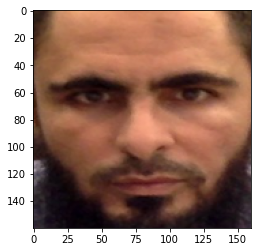

In [ ]:
#complete the code from the lecture


Great, now we are ready to apply the FaceNet face recognition model to generate the embedding of the detected face.

### 4.  Create Face Embedding


In [ ]:
#complete the code from the lecture


2.5.0


In [ ]:
facenet_128_model = tf.keras.models.load_model(PROJECT_PATH+'facenet_models/'+'facenet_keras_128.h5')

In [ ]:
#complete the code from the lecture


In [ ]:
#complete the code from the lecture



In [ ]:
print(face_embedding)

[ 0.08466603 -0.3475511   3.4209394  -1.9954991  -0.5338216   0.14251493
 -1.173984    0.1537653   1.3865316  -0.31546798  1.3652018  -0.36628395
 -0.5653573   0.06632276 -1.030072    1.9518121   0.5719892   1.0134771
  0.67746323 -0.16382572  0.9850427   0.33263454  1.6311436   0.40706494
  1.5680499  -0.50489426 -1.6228744   0.21611963 -0.27434838 -1.5950865
 -1.9434835  -0.56729233 -1.4460573   0.43255317  2.2458067   1.7402811
  1.5389347   0.75993216  0.4001241   1.576693   -0.14574687 -0.48011443
  0.74917805  0.2667293  -1.4714024   0.392095   -1.1596574  -0.42026752
 -1.3215666   1.3169694  -0.42405462  0.18041667  0.374739    0.6362148
 -0.7867809  -0.08103784  0.5037749  -0.59501773 -1.6646216   0.61307317
  1.8814664  -0.5969415  -0.6054642  -0.34983122 -0.5255398   0.62390333
  1.3625125  -0.06537678  0.33991787  0.03130793 -0.34111267  0.5518459
  0.05610406 -0.64074075  1.3869294  -0.3059667   0.06733827  0.12305349
 -0.7367883  -0.19391155  0.18534195 -1.0919724   0.0647

In [ ]:
#complete the code from the lecture


<class 'numpy.ndarray'>


In [ ]:
#complete the code from the lecture


128


In [ ]:
#complete the code from the lecture


(128,)

### 5 Save Embedding in a File

In [ ]:
#complete the code from the lecture


In [ ]:
#complete the code from the lecture


In [ ]:
#complete the code from the lecture


# 6 Load the Embedding from a File

In [ ]:
#complete the code from the lecture


In [ ]:
#complete the code from the lecture


In [ ]:
#complete the code from the lecture


Anis


In [ ]:
#complete the code from the lecture


[ 0.08466603 -0.3475511   3.4209394  -1.9954991  -0.5338216   0.14251493
 -1.173984    0.1537653   1.3865316  -0.31546798  1.3652018  -0.36628395
 -0.5653573   0.06632276 -1.030072    1.9518121   0.5719892   1.0134771
  0.67746323 -0.16382572  0.9850427   0.33263454  1.6311436   0.40706494
  1.5680499  -0.50489426 -1.6228744   0.21611963 -0.27434838 -1.5950865
 -1.9434835  -0.56729233 -1.4460573   0.43255317  2.2458067   1.7402811
  1.5389347   0.75993216  0.4001241   1.576693   -0.14574687 -0.48011443
  0.74917805  0.2667293  -1.4714024   0.392095   -1.1596574  -0.42026752
 -1.3215666   1.3169694  -0.42405462  0.18041667  0.374739    0.6362148
 -0.7867809  -0.08103784  0.5037749  -0.59501773 -1.6646216   0.61307317
  1.8814664  -0.5969415  -0.6054642  -0.34983122 -0.5255398   0.62390333
  1.3625125  -0.06537678  0.33991787  0.03130793 -0.34111267  0.5518459
  0.05610406 -0.64074075  1.3869294  -0.3059667   0.06733827  0.12305349
 -0.7367883  -0.19391155  0.18534195 -1.0919724   0.0647